In [1]:
import pandas as pd
import math
from keras import models
from keras import layers
from keras import regularizers
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import mean_squared_error
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
from google.colab import files 
uploaded = files.upload()

Saving vyborki.xlsx to vyborki.xlsx


In [4]:
df = pd.read_excel('vyborki.xlsx')
df.head()

# fill empty values ​​with the last number
df=df.fillna(222)
df = df.replace(222,np.nan).ffill()

# average for each hour
df.iloc[193:1009, :] = df.iloc[193:1009, :].rolling(13).mean().reindex(df.index[::13])

# average for every two hours
df.iloc[1009:1512, :] = df.iloc[1009:1512, :].rolling(25).mean().reindex(df.index[::25])
df = pd.concat([df[x].dropna().reset_index(drop=True) for x in df], axis=1)

In [5]:
# day
fet = df['d']
dataset = fet.values
met=dataset[:]

data = []
data.append(met[:])

date = np.array(data)

In [6]:
# train data
x_train = np.array(df.iloc[0:193, 0:45]).transpose() # input values - 16 hours
y_train = np.array(df.iloc[188:, 0:45]).transpose() # targets

# test data
x_test= np.array(df.iloc[0:193, 45:60]).transpose()
y_test = np.array(df.iloc[188:, 45:60]).transpose()

In [7]:
np.random.seed(42)
train_data = x_train
train_targets = y_train

In [8]:
# ANN model
def build_model(optimizer='adam'):
  tf.random.set_seed(42)
  model = models.Sequential()
  model.add(layers.Dense(128, activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(98, activation='relu'))
  model.add(Dropout(0.1))
  model.add(layers.Dense(86, activation='linear'))
  model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
  return model

In [10]:
# model training
model3=build_model(tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.9, beta_2=0.999, amsgrad=False))
history3 = model3.fit(x_train, y_train, epochs=1245, validation_data=(x_test, y_test),batch_size=1, verbose=2)

Epoch 1/1245
45/45 - 1s - loss: 0.0014 - mae: 0.0257 - val_loss: 8.1318e-04 - val_mae: 0.0184 - 636ms/epoch - 14ms/step
Epoch 2/1245
45/45 - 0s - loss: 7.2048e-04 - mae: 0.0160 - val_loss: 4.5068e-04 - val_mae: 0.0128 - 113ms/epoch - 3ms/step
Epoch 3/1245
45/45 - 0s - loss: 5.0730e-04 - mae: 0.0131 - val_loss: 3.2069e-04 - val_mae: 0.0111 - 116ms/epoch - 3ms/step
Epoch 4/1245
45/45 - 0s - loss: 3.7917e-04 - mae: 0.0114 - val_loss: 2.9441e-04 - val_mae: 0.0107 - 205ms/epoch - 5ms/step
Epoch 5/1245
45/45 - 0s - loss: 3.2679e-04 - mae: 0.0109 - val_loss: 3.5493e-04 - val_mae: 0.0118 - 231ms/epoch - 5ms/step
Epoch 6/1245
45/45 - 0s - loss: 2.9902e-04 - mae: 0.0105 - val_loss: 2.3539e-04 - val_mae: 0.0098 - 273ms/epoch - 6ms/step
Epoch 7/1245
45/45 - 0s - loss: 2.5257e-04 - mae: 0.0097 - val_loss: 2.2386e-04 - val_mae: 0.0097 - 247ms/epoch - 5ms/step
Epoch 8/1245
45/45 - 0s - loss: 2.1248e-04 - mae: 0.0091 - val_loss: 1.9629e-04 - val_mae: 0.0094 - 217ms/epoch - 5ms/step
Epoch 9/1245
45/45 

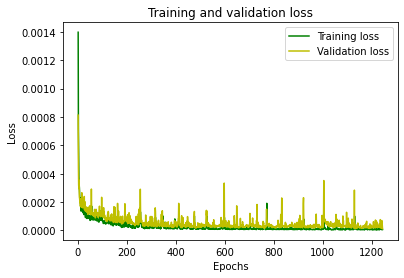

In [71]:
# change mse by epoch
plt.clf()
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'y', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

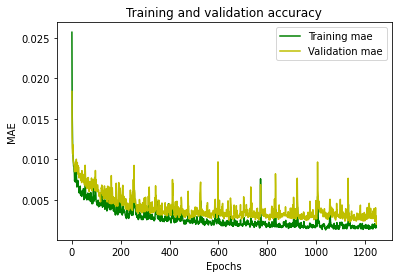

In [72]:
# change mae by epoch
plt.clf()
acc = history3.history['mae']
val_acc = history3.history['val_mae']
plt.plot(epochs, acc, 'g', label='Training mae')
plt.plot(epochs, val_acc, 'y', label='Validation mae')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [16]:
# minimum mae by epoch
np.array(val_acc).min()

0.001974620623514056

In [19]:
# epoch where minumum mae
i, = np.where(np.array(val_acc) == np.array(val_acc).min())

In [20]:
i

array([1244])

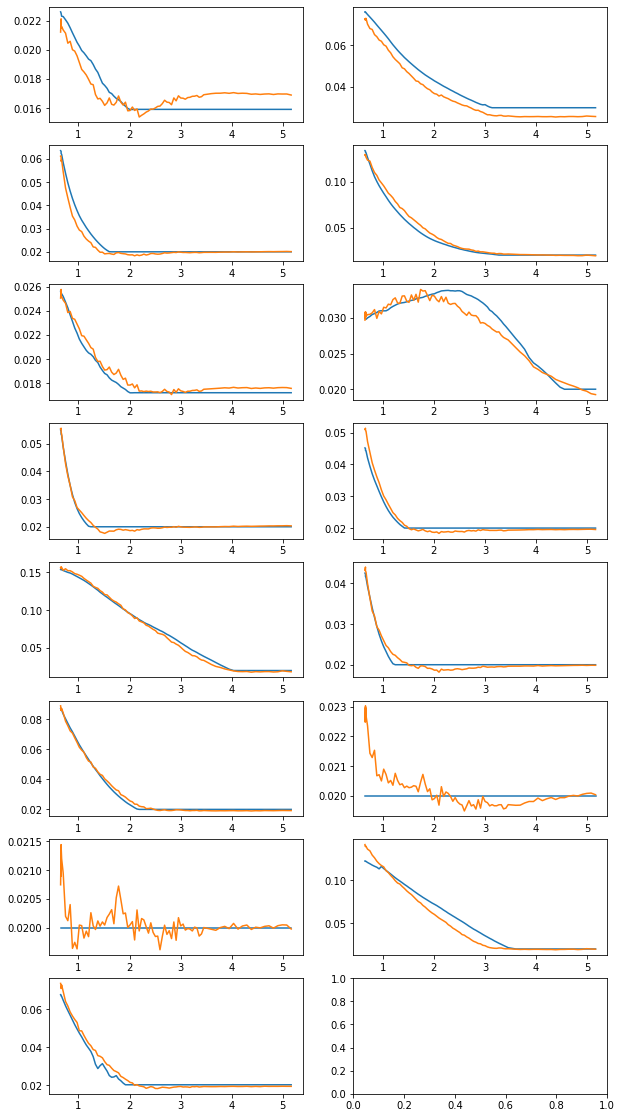

In [21]:
# blue = real voltage, orange - predicted voltage
pred = model3(x_test)
t = pred
t1 = y_test
fig, ax = plt.subplots(8, 2, figsize=(10, 20))
axs = [ax[i, j] for i in range(8) for j in range(2)]
for i in range(0, 15):
    axs[i].plot(date[0, 188:], t1[i])
    axs[i].plot(date[0, 188:], t[i])

In [22]:
# mean absolute error (mae) for test data
mae_er = []
for i in range(0, 15):
  mae_er.append(mean_absolute_error(t1[i], t[i]))

In [23]:
# mean absolute error (mae) for test data
mae_er

[0.0008023894090705172,
 0.004650489210863809,
 0.001623433522464244,
 0.0035476604347099033,
 0.0003754449619109607,
 0.0011268543452578232,
 0.0006637053408088692,
 0.0013713114683631378,
 0.002983632753021236,
 0.0007732728929393896,
 0.0011869128615330507,
 0.00048343166882215585,
 0.00019172249145286047,
 0.00776570338634552,
 0.0020733404823220685]

In [24]:
# mean mae
np.mean(mae_er)

0.0019746203486590364

In [25]:
# max absolute error (max)
max_er = []
for i in range(0, 15):
  max_er.append(max_error(t1[i], t[i]))

In [26]:
# max absolute error (max)
max_er

[0.001820997636822582,
 0.0063172338678285644,
 0.007594937053093553,
 0.009506202758275614,
 0.0012455889050775985,
 0.0030465382828159873,
 0.002382921501994168,
 0.006392413675785066,
 0.007478179917426955,
 0.0023146288844255354,
 0.0035827817407938813,
 0.0030250135064125057,
 0.0014379299432039257,
 0.019076051712036135,
 0.007326487336250482]

In [28]:
# mean max
np.mean(max_er)

0.005503193781482836

In [29]:
# mean absolute percentage error (mape)
S = 0
mape_er = []
for j in range(0, y_test.shape[0]):
  for i in range(0, y_test.shape[1]):
    S += abs(y_test[j, i]-pred[j, i])/abs(pred[j, i])
  mape_er.append(S/y_test.shape[1])
  S = 0

In [30]:
# mape
mape_er

[<tf.Tensor: shape=(), dtype=float32, numpy=0.04593926>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.1309355>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.059920598>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.06859783>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.019580854>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.03869049>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.031567372>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.050200146>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.060363416>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.03570788>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.042741355>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.022824788>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.009344506>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.17183542>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.06944827>]

In [73]:
# mean mape
np.mean(mape_er)

0.05717985

In [55]:
# simpson's method for integrating amperage
def Q_Simpson(x, f):
  Q=[]
  SUM_Q = 0
  for i in range(2, f.shape[0]):
    SUM_Q+=(x[i]-x[i-2])*(f[i-2]+4*f[i-1]+f[i])/6
    Q.append(SUM_Q)
  return Q

In [56]:
# minutes
fet = df['min']
dataset = fet.values
met=dataset[:]

minut = []
minut.append(met[:])

minut = np.array(minut)

In [57]:
# seconds
second = minut*60

In [58]:
# charge received at predicted voltage
Q_pred = np.array([Q_Simpson(second[0], np.concatenate([x_test[i], t[i][5:]])/100) for i in range(0, 15)])

# charge received at real voltage
Q_real = np.array([Q_Simpson(second[0], np.concatenate([x_test[i], t1[i][5:]])/100) for i in range(0, 15)])

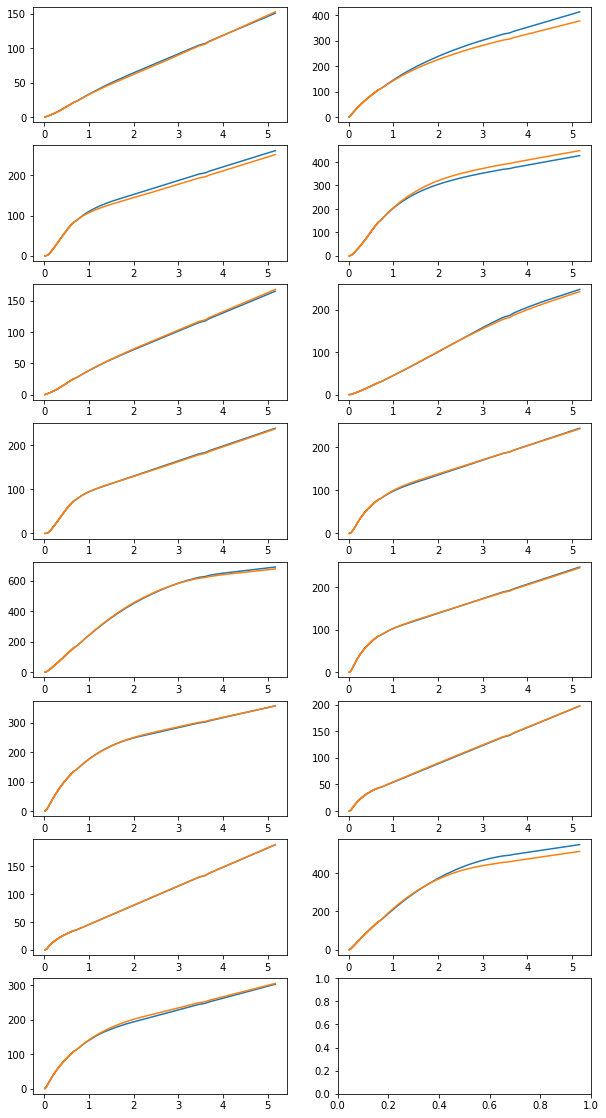

In [59]:
# blue = real charge, orange - predicted charge
fig, ax = plt.subplots(8, 2, figsize=(10, 20))
axs = [ax[i, j] for i in range(8) for j in range(2)]
for i in range(0, 15):
    axs[i].plot(date[0, 2:], Q_real[i])
    axs[i].plot(date[0, 2:], Q_pred[i])

In [60]:
# mean absolute error (mae)
TEST_MAE_ERROR = []
for i in range(0, 15):
  TEST_MAE_ERROR.append(mean_absolute_error(Q_real[i, 144:], Q_pred[i, 144:]))

In [61]:
# mean absolute error (mae)
TEST_MAE_ERROR 

[1.4535939504657323,
 17.011536285404517,
 8.023595343341356,
 15.784859943140424,
 1.3404231019605533,
 2.184018292621967,
 1.2313325121804608,
 1.4400813437949262,
 4.784471080039336,
 0.9851700972523638,
 1.5201880936493815,
 0.894105032622911,
 0.20328927020663443,
 18.248323033641295,
 4.794621050197689]

In [62]:
# mean mae
np.array(TEST_MAE_ERROR).mean()

5.326640562034637

In [63]:
# max absolute error (max)
TEST_MAE_ERROR = []
for i in range(0, 15):
  TEST_MAE_ERROR.append(max_error(Q_real[i, 144:], Q_pred[i, 144:]))

In [64]:
# max absolute error (max)
TEST_MAE_ERROR

[2.2028776384327955,
 35.61781461628243,
 9.832754096099194,
 21.7577129815013,
 2.797673923297964,
 5.638445827828008,
 1.9540191405747294,
 3.0072143123064734,
 12.451299530658616,
 1.9594048373303679,
 3.12070733326226,
 1.310071620047026,
 0.33433866865925665,
 35.363512488769516,
 7.662099470899619]

In [65]:
# mean max
np.array(TEST_MAE_ERROR).mean()

9.667329765729969

In [66]:
# mean absolute percentage error (mape)
S = 0
E = []
for j in range(0, Q_real.shape[0]):
  for i in range(144, Q_real.shape[1]):
    S += abs(Q_real[j, i]-Q_pred[j, i])/abs(Q_pred[j, i])
  E.append(S/  Q_real.shape[1])
  S = 0

In [67]:
# mean absolute percentage error (mape)
E

[0.006104604921323046,
 0.017643476885408134,
 0.013922660752546667,
 0.012738886264840033,
 0.0038654430539073656,
 0.003676385769507514,
 0.0021901614771879193,
 0.0030883975874776114,
 0.002614794503698083,
 0.0017331439690678994,
 0.0016446827583435045,
 0.0027130422935054046,
 0.0005840613238743515,
 0.012189983145539325,
 0.006454537918009463]

In [68]:
# mean mape
np.array(E).mean()

0.006077617508282422

In [69]:
# max mape
S = 0
E = []
D = []
for j in range(0, Q_real.shape[0]):
  for i in range(x_train.shape[1], Q_real.shape[1]):
    D.append(abs(Q_real[j, i]-Q_pred[j, i])/abs(Q_pred[j, i]))

In [74]:
# max mape
np.array(D).max()

0.09425040491227044